**Import Libraries**

In [40]:
import numpy as np
import pandas as pd
from numpy import unique
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt


**Read Data**

In [22]:
#Load data
data = pd.read_csv('../../data/raw/gamalytic_steam_games.csv')

**Features Extraction**

In [23]:
selected_features = data[['price', 'copiesSold', 'reviewScore']]

**Dropping Irrelevant Columns**
 - To check duplicate rows we need to drop it

In [24]:
data = data.drop(columns = ['steamId'])

**Identify Columns That Contain a Single Value**
  - Columns that have a single observation or value are probably useless for modeling.

In [25]:
# Check if column has a single value
print(1, len(unique(data['price'])))
print(2, len(unique(data['copiesSold'])))
print(3, len(unique(data['reviewScore'])))

1 350
2 22474
3 99


 **Check Duplicates**

In [16]:
duplicates = data.duplicated()
print("Any duplicates ?", duplicates.any())
print("Duplicate rows:\n", data[duplicates])

Any duplicates ? True
Duplicate rows:
        price  copiesSold publisherClass  reviewScore  aiContent
11590   0.00       21263       Hobbyist           97        NaN
11633   9.99       21131          Indie           82        NaN
11842   0.00       20414       Hobbyist           85        NaN
12427  14.99       18304          Indie           84        NaN
12604   0.00       17802          Indie           84        NaN
...      ...         ...            ...          ...        ...
93323   0.99           1       Hobbyist            0        NaN
93329   4.99           0       Hobbyist            0        NaN
93330   0.99           0       Hobbyist            0        NaN
93331   0.99           0       Hobbyist            0        NaN
93337   4.99           0       Hobbyist            0        NaN

[26163 rows x 5 columns]


**Remove Duplicates**

In [26]:
print(data.shape)
# delete duplicate rows
data.drop_duplicates(inplace = True)
print(data.shape)

(93338, 5)
(67175, 5)


**Count Missing Values**

In [27]:
print(data[['price', 'copiesSold', 'reviewScore']].isna().sum())

price          0
copiesSold     0
reviewScore    0
dtype: int64


**Checking Inconsistent Values**
 - Checking for Negative Values

In [19]:
# Check if any value is negative
negative_price = (data['price'] < 0).any()
negative_copies = (data['copiesSold'] < 0).any()
negative_review = (data['reviewScore'] < 0).any()

print(f"Negative 'price' values: {negative_price}")
print(f"Negative 'copiesSold' values: {negative_copies}")
print(f"Negative 'reviewScore' values: {negative_review}")


Negative 'price' values: False
Negative 'copiesSold' values: False
Negative 'reviewScore' values: False


**Data Transformation**
 - Analyzing Skewness

In [28]:
# Check initial skewness of distributions
print(f"Price skewness: {skew(data['price']):.2f}")
print(f"CopiesSold skewness: {skew(data['copiesSold']):.2f}")
print(f"reviewScore skewness: {skew(data['reviewScore']):.2f}")

Price skewness: 30.24
CopiesSold skewness: 99.76
reviewScore skewness: -1.17


**Log Transformation For Skewed Data**

In [29]:
# Apply log transformation to reduce skewness
data['price'] = np.log1p(data['price'])
data['copiesSold'] = np.log1p(data['copiesSold'])

**Handling Outliers in Review Scores**

In [31]:
low = data['reviewScore'].quantile(0.25)
high = data['reviewScore'].quantile(0.75)
median = data['reviewScore'].median()

data.loc[data['reviewScore'] < low, 'reviewScore'] = median
data.loc[data['reviewScore'] > high, 'reviewScore'] = high



**Check skewness after transformation**

In [32]:
# Check skewness after outlier treatment
print("After outlier treatment:")
print(f"Price skewness: {skew(data['price']):.2f}")
print(f"CopiesSold skewness: {skew(data['copiesSold']):.2f}")
print(f"reviewScore skewness: {skew(data['reviewScore']):.2f}")

After outlier treatment:
Price skewness: -0.14
CopiesSold skewness: 0.40
reviewScore skewness: -0.45


**Feature Scaling**

In [283]:
scaler = StandardScaler()
data[['price', 'copiesSold', 'reviewScore']] = scaler.fit_transform(
    data[['price', 'copiesSold', 'reviewScore']]
)

**Feature Analysis**
 - Correlation Analysis

In [34]:
# # Calculate Pearson correlation between features
correlation = selected_features.corr()

print(correlation['copiesSold'].sort_values(ascending = False))


copiesSold     1.000000
reviewScore    0.021909
price          0.021256
Name: copiesSold, dtype: float64


**Mutual Information Scores**

In [36]:
# Calculate mutual information (non-linear relationships)
mi_scores = mutual_info_regression(selected_features.drop(columns = ['copiesSold']), selected_features['copiesSold'])
print(mi_scores)


[0.17663902 0.77776899]


**ANOVA F-values**

In [39]:
# Calculate ANOVA F-values for feature importance
selector = SelectKBest(score_func = f_regression, k = 2)
selector.fit((selected_features.drop(columns = ['copiesSold'])), selected_features['copiesSold'])
print(selector.scores_)


[42.18832633 44.82141659]


**Data Visualization**

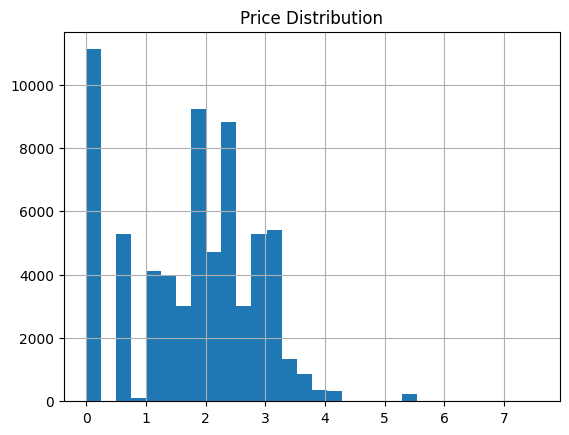

In [42]:
# Visualize distribution of prices
data['price'].hist(bins = 30)
plt.title('Price Distribution')
plt.show()


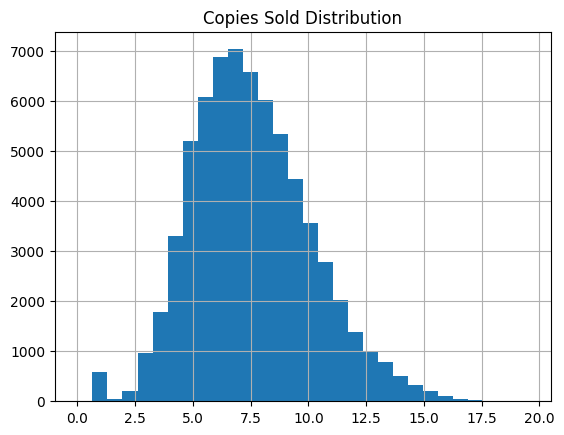

In [41]:
# Visualize distribution of copiesSold
data['copiesSold'].hist(bins = 30)
plt.title('Copies Sold Distribution')
plt.show()


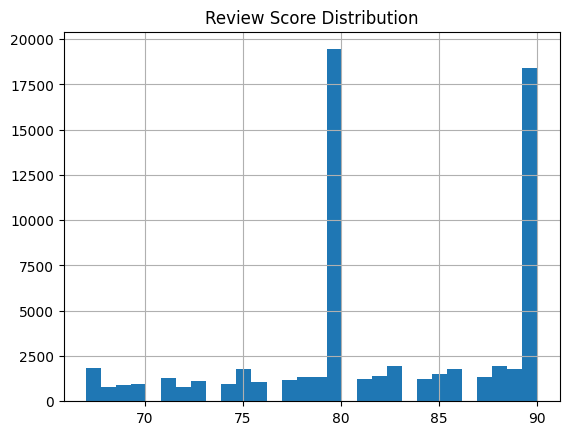

In [43]:
# Visualize distribution of Review Score
data['reviewScore'].hist(bins = 30)
plt.title('Review Score Distribution')
plt.show()
